-56.7094088570738
-56.70740536590715
-56.709348248134305


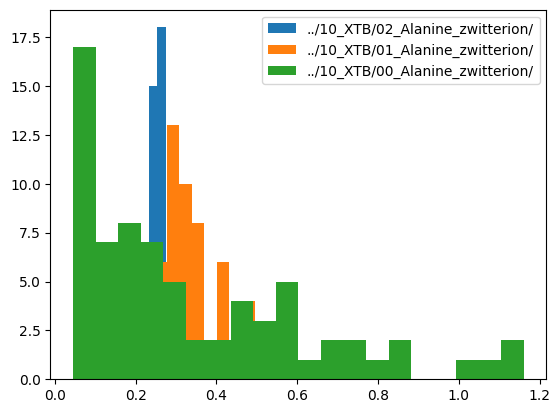

In [85]:
import numpy as np
from ase.io import read

def kabsch_align(P, Q):
    P_cent = P - P.mean(axis=0)
    Q_cent = Q - Q.mean(axis=0)
    C = np.dot(P_cent.T, Q_cent)
    V, S, Wt = np.linalg.svd(C)
    d = np.linalg.det(np.dot(Wt.T, V.T))
    D = np.identity(3)
    D[2, 2] = d
    U = np.dot(np.dot(Wt.T, D), V.T)
    Q_rot = np.dot(Q_cent, U)
    return P_cent, Q_rot

def calculate_rmsd(P, Q):
    return np.sqrt(((P - Q) ** 2).sum() / len(P))

# 파일 경로 설정
dir = {
     "../10_XTB/00_Alanine_zwitterion/",
     "../10_XTB/01_Alanine_zwitterion/",
     "../10_XTB/02_Alanine_zwitterion/"
}
for dir1 in dir:
    orifile1 = dir1 + "case_001/case_001.xyz"
    import os
    ls1 = []
    ls2 = []
    ls3 = [] 
    idx = []
    for d in  [ x for x in os.listdir(dir1)]:
        try:
            file1 = dir1 + d + "/xtbopt.xyz"
            with open(file1, "r") as f:
                energy = float(f.readlines()[1].strip().split(" ")[1])
            # ASE로 전체 원자 구조 불러오기
            atoms_ori1 = read(orifile1)
            atoms_opt1 = read(file1)

            # 양쪽성 이온 부분만 슬라이싱 (index 2~14 → Python 기준 0-based이므로 [2:15])
            ion_ori1 = atoms_ori1[:13]
            ion_opt1 = atoms_opt1[:13]
            # 좌표 추출
            P1 = ion_ori1.get_positions()
            Q1 = ion_opt1.get_positions()

            # RMSD 계산
            P_ref1, Q1_aligned1 = kabsch_align(P1, Q1)
            rmsd1 = calculate_rmsd(P_ref1, Q1_aligned1)
            ls1.append(rmsd1)
            ls2.append(energy)
            idx.append(d)
        except:
            pass
    dic = {"name" : idx ,  "ref1" : ls1, "energy" : ls2}
    import pandas as pd 
    df = pd.DataFrame(dic)
    import matplotlib.pyplot as plt
    plt.hist(df["ref1"], bins = 20, label = dir1)
    print(df.sort_values("ref1").reset_index().iloc[:20]["energy"].mean())
plt.legend()

In [89]:
ddd = df.sort_values("ref1")
ddd[ddd["ref1"] < 0.1].sort_values("energy")

,name,ref1,energy
66,case_091,0.050121,-56.716159
29,case_044,0.077089,-56.715339
26,case_039,0.053930,-56.714251
6,case_009,0.044759,-56.712844
30,case_045,0.079490,-56.711473
0,case_001,0.058911,-56.711402
31,case_046,0.064485,-56.711375
36,case_053,0.065645,-56.711022
42,case_059,0.064890,-56.710908
17,case_026,0.060257,-56.710767


In [79]:
from ase.io import write

# 예: ion_ori1을 'zwitterion_fragment.xyz'라는 파일로 저장
write("zwitterion_fragment.xyz", ion_ori1)


Atoms(symbols='O2CNH7OH', pbc=False)

In [30]:
import numpy as np
from ase.io import read

def kabsch_align(P, Q):
    P_cent = P - P.mean(axis=0)
    Q_cent = Q - Q.mean(axis=0)
    C = np.dot(P_cent.T, Q_cent)
    V, S, Wt = np.linalg.svd(C)
    d = np.linalg.det(np.dot(Wt.T, V.T))
    D = np.identity(3)
    D[2, 2] = d
    U = np.dot(np.dot(Wt.T, D), V.T)
    Q_rot = np.dot(Q_cent, U)
    return P_cent, Q_rot

def calculate_rmsd(P, Q):
    return np.sqrt(((P - Q) ** 2).sum() / len(P))

# 파일 경로 설정
dir1 = "../10_XTB/00_Alanine_zwitterion/"
dir2 = "../10_XTB/01_Alanine_zwitterion/"
dir3 = "../10_XTB/02_Alanine_zwitterion/"
orifile1 = dir1 + "case_001/case_001.xyz"
orifile2 = dir2 + "case_001/case_001.xyz"
orifile3 = dir3 + "case_001/case_001.xyz"
import os
ls1 = []
ls2 = []
ls3 = [] 
idx = []
for d in  [ x for x in os.listdir(dir1)]:
    try:
        file1 = dir1 + d + "/xtbopt.xyz"
        # ASE로 전체 원자 구조 불러오기
        atoms_ori1 = read(orifile1)
        atoms_ori2 = read(orifile2)
        atoms_ori3 = read(orifile3)
        atoms_opt1 = read(file1)

        # 양쪽성 이온 부분만 슬라이싱 (index 2~14 → Python 기준 0-based이므로 [2:15])
        ion_ori1 = atoms_ori1[2:15]
        ion_ori2 = atoms_ori2[2:15]
        ion_ori3 = atoms_ori3[2:15]
        ion_opt1 = atoms_opt1[2:15]
        # 좌표 추출
        P1 = ion_ori1.get_positions()
        P2 = ion_ori2.get_positions()
        P3 = ion_ori3.get_positions()
        Q1 = ion_opt1.get_positions()

        # RMSD 계산
        P_ref1, Q1_aligned1 = kabsch_align(P1, Q1)
        P_ref2, Q1_aligned2 = kabsch_align(P2, Q1)
        P_ref3, Q1_aligned3 = kabsch_align(P3, Q1)
        rmsd1 = calculate_rmsd(P_ref1, Q1_aligned1)
        rmsd2 = calculate_rmsd(P_ref2, Q1_aligned2)
        rmsd3 = calculate_rmsd(P_ref3, Q1_aligned3)
        ls1.append(rmsd1)
        ls2.append(rmsd2)
        ls3.append(rmsd3)
        idx.append(d)
    except:
        pass
dic = {"name" : idx ,  "ref1" : ls1 , "ref2" : ls2, "ref3" : ls3}
import pandas as pd 
df = pd.DataFrame(dic)

In [36]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from ase.io import read
from sklearn.cluster import DBSCAN
from tqdm import tqdm

# Kabsch alignment
def kabsch_align(P, Q):
    P_cent = P - P.mean(axis=0)
    Q_cent = Q - Q.mean(axis=0)
    C = np.dot(P_cent.T, Q_cent)
    V, S, Wt = np.linalg.svd(C)
    d = np.linalg.det(np.dot(Wt.T, V.T))
    D = np.identity(3)
    D[2, 2] = d
    U = np.dot(np.dot(Wt.T, D), V.T)
    Q_rot = np.dot(Q_cent, U)
    return P_cent, Q_rot

# RMSD 계산
def calculate_rmsd(P, Q):
    return np.sqrt(((P - Q) ** 2).sum() / len(P))

# 경로 설정
dirs = [
    "../10_XTB/00_Alanine_zwitterion/",
    "../10_XTB/01_Alanine_zwitterion/",
    "../10_XTB/02_Alanine_zwitterion/"
]

# 모든 xtbopt 파일 경로 수집
files = []
for d in dirs:
    for sub in os.listdir(d):
        xtb_path = Path(d) / sub / "xtbopt.xyz"
        if xtb_path.exists():
            files.append(str(xtb_path))

print(f"🔍 총 {len(files)}개의 구조를 읽습니다...")

# 모든 구조물 로드 (2~14 인덱스 원자만 사용)
structures = []
names = []

for f in files:
    try:
        atoms = read(f)[2:15]  # index 2~14, 총 13개
        structures.append(atoms.get_positions())
        names.append(f)
    except Exception as e:
        print(f"⚠️ 오류 발생: {f} - {e}")

# RMSD 행렬 계산
n = len(structures)
rmsd_matrix = np.zeros((n, n))

print("📐 RMSD 행렬 계산 중...")
for i in tqdm(range(n)):
    for j in range(i + 1, n):
        Pi, Qj = structures[i], structures[j]
        _, Qj_aligned = kabsch_align(Pi, Qj)
        rmsd = calculate_rmsd(Pi - Pi.mean(0), Qj_aligned)
        rmsd_matrix[i, j] = rmsd_matrix[j, i] = rmsd

# DBSCAN 군집화 수행 (eps는 RMSD 임계값, 예: 0.5Å)
db = DBSCAN(eps=1, min_samples=4, metric="precomputed")
labels = db.fit_predict(rmsd_matrix)

# 결과 저장
df = pd.DataFrame({
    "structure": names,
    "cluster": labels
})
df.to_csv("xtb_conformer_clusters.csv", index=False)
print("✅ 군집화 완료: xtb_conformer_clusters.csv 저장됨")


🔍 총 195개의 구조를 읽습니다...
📐 RMSD 행렬 계산 중...


100%|██████████| 195/195 [00:01<00:00, 106.74it/s]

✅ 군집화 완료: xtb_conformer_clusters.csv 저장됨


In [44]:
for eps in np.linspace(0.5, 1.0, 100):
    db = DBSCAN(eps=eps, min_samples=4, metric="precomputed")
    labels = db.fit_predict(rmsd_matrix)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps={eps:.3f} → 군집 수: {n_clusters}, 노이즈 수: {n_noise}")


eps=0.500 → 군집 수: 12, 노이즈 수: 104
eps=0.505 → 군집 수: 11, 노이즈 수: 102
eps=0.510 → 군집 수: 11, 노이즈 수: 102
eps=0.515 → 군집 수: 12, 노이즈 수: 98
eps=0.520 → 군집 수: 11, 노이즈 수: 97
eps=0.525 → 군집 수: 11, 노이즈 수: 96
eps=0.530 → 군집 수: 11, 노이즈 수: 95
eps=0.535 → 군집 수: 11, 노이즈 수: 95
eps=0.540 → 군집 수: 9, 노이즈 수: 94
eps=0.545 → 군집 수: 9, 노이즈 수: 91
eps=0.551 → 군집 수: 9, 노이즈 수: 91
eps=0.556 → 군집 수: 8, 노이즈 수: 91
eps=0.561 → 군집 수: 7, 노이즈 수: 90
eps=0.566 → 군집 수: 7, 노이즈 수: 90
eps=0.571 → 군집 수: 7, 노이즈 수: 89
eps=0.576 → 군집 수: 7, 노이즈 수: 89
eps=0.581 → 군집 수: 7, 노이즈 수: 87
eps=0.586 → 군집 수: 7, 노이즈 수: 87
eps=0.591 → 군집 수: 7, 노이즈 수: 82
eps=0.596 → 군집 수: 7, 노이즈 수: 80
eps=0.601 → 군집 수: 7, 노이즈 수: 80
eps=0.606 → 군집 수: 7, 노이즈 수: 80
eps=0.611 → 군집 수: 6, 노이즈 수: 77
eps=0.616 → 군집 수: 7, 노이즈 수: 73
eps=0.621 → 군집 수: 7, 노이즈 수: 69
eps=0.626 → 군집 수: 7, 노이즈 수: 67
eps=0.631 → 군집 수: 6, 노이즈 수: 63
eps=0.636 → 군집 수: 6, 노이즈 수: 63
eps=0.641 → 군집 수: 6, 노이즈 수: 62
eps=0.646 → 군집 수: 6, 노이즈 수: 62
eps=0.652 → 군집 수: 6, 노이즈 수: 59
eps=0.657 → 군집 수: 6, 노이즈 수: 

In [47]:
dir = "../10_XTB/00_Alanine_zwitterion/"
t = ""
for i in os.listdir(dir):
    file = dir + i + "/xtbopt.xyz"
    try:
        with open(file, "r") as f:
            dd = f.readlines()
            t+= "13\n\n" + ''.join(dd[2:15])
            
            
    except:
        pass
with open("integ.xyz" , 'w') as f:
    f.write(t)


In [57]:
# 경로 설정
dirs = [
    "../10_XTB/00_Alanine_zwitterion/",
    "../10_XTB/01_Alanine_zwitterion/",
    "../10_XTB/02_Alanine_zwitterion/"
]

# 모든 xtbopt 파일 경로 수집
dic = {}
for d in dirs:
    dic[d] = []
    for sub in os.listdir(d):
        xtb_path = Path(d) / sub / "xtbopt.xyz"
        try:
            with open(xtb_path, 'r') as f:
                dic[d].append(float(f.readlines()[1].strip().split(" ")[1]))
        except:
            pass
for key, value in dic.items():
    print(key, np.mean(value))

../10_XTB/00_Alanine_zwitterion/ -56.70985714898992
../10_XTB/01_Alanine_zwitterion/ -56.70796916069565
../10_XTB/02_Alanine_zwitterion/ -56.70759281932294


In [58]:
# 경로 설정
dirs = [
    "../10_XTB/00_Aminobutyric-acid_zwitterion/",
    "../10_XTB/02_Aminobutyric-acid_zwitterion/",
    "../10_XTB/04_Aminobutyric-acid_zwitterion/",
    "../10_XTB/07_Aminobutyric-acid_zwitterion/",
]

# 모든 xtbopt 파일 경로 수집
dic = {}
for d in dirs:
    dic[d] = []
    for sub in os.listdir(d):
        xtb_path = Path(d) / sub / "xtbopt.xyz"
        try:
            with open(xtb_path, 'r') as f:
                dic[d].append(float(f.readlines()[1].strip().split(" ")[1]))
        except:
            pass
for key, value in dic.items():
    print(key, np.mean(value))

../10_XTB/00_Aminobutyric-acid_zwitterion/ -59.8731306677776
../10_XTB/02_Aminobutyric-acid_zwitterion/ -59.87506402889584
../10_XTB/04_Aminobutyric-acid_zwitterion/ -59.87318063586515
../10_XTB/07_Aminobutyric-acid_zwitterion/ -59.875465912982826
